# Notebook to download weather data
Using the open meteo API. Daily mean air temperature at 2 m height is used, which is the standard meteorological measure representing near-surface atmospheric conditions relevant for vegetation growth.
Also the coordinates used are for Berlin in general, not per tree or per district.

In [1]:
import requests
import pandas as pd

In [2]:
LAT = 52.52
LON = 13.41

url = "https://archive-api.open-meteo.com/v1/archive"

params = {
    "latitude": LAT,
    "longitude": LON,
    "start_date": "2022-03-01",
    "end_date": "2022-09-30",
    "daily": [
        "temperature_2m_mean",
        "precipitation_sum"
    ],
    "timezone": "Europe/Berlin"
}

response = requests.get(url, params=params)
data = response.json()

In [3]:
daily_df = pd.DataFrame({
    "date": pd.to_datetime(data["daily"]["time"]),
    "temp_mean": data["daily"]["temperature_2m_mean"],
    "precipitation": data["daily"]["precipitation_sum"]
})

daily_df.head()

,date,temp_mean,precipitation
0,2022-03-01,0.5,0.0
1,2022-03-02,0.8,0.0
2,2022-03-03,-1.1,0.0
3,2022-03-04,1.2,0.0
4,2022-03-05,-0.0,0.1


In [4]:
daily_df["month"] = daily_df["date"].dt.month

monthly_weather = (
    daily_df
    .groupby("month")
    .agg({
        "temp_mean": "mean",        # average temperature per month
        "precipitation": "sum"      # total precipitation per month
    })
    .reset_index()
)

monthly_weather

,month,temp_mean,precipitation
0,3,4.441935,2.2
1,4,8.153333,38.0
2,5,15.516129,50.1
3,6,19.970000,35.1
4,7,20.251613,44.9
5,8,21.754839,63.4
6,9,13.720000,50.9


In [5]:
weather_wide = monthly_weather.set_index("month")

weather_features = pd.DataFrame({
    "temp_m3": weather_wide.loc[3, "temp_mean"],
    "temp_m4": weather_wide.loc[4, "temp_mean"],
    "temp_m5": weather_wide.loc[5, "temp_mean"],
    "temp_m6": weather_wide.loc[6, "temp_mean"],
    "temp_m7": weather_wide.loc[7, "temp_mean"],
    "temp_m8": weather_wide.loc[8, "temp_mean"],
    "temp_m9": weather_wide.loc[9, "temp_mean"],
    "precip_m3": weather_wide.loc[3, "precipitation"],
    "precip_m4": weather_wide.loc[4, "precipitation"],
    "precip_m5": weather_wide.loc[5, "precipitation"],
    "precip_m6": weather_wide.loc[6, "precipitation"],
    "precip_m7": weather_wide.loc[7, "precipitation"],
    "precip_m8": weather_wide.loc[8, "precipitation"],
    "precip_m9": weather_wide.loc[9, "precipitation"],
}, index=[0])

weather_features


,temp_m3,temp_m4,temp_m5,temp_m6,temp_m7,temp_m8,temp_m9,precip_m3,precip_m4,precip_m5,precip_m6,precip_m7,precip_m8,precip_m9
0,4.441935,8.153333,15.516129,19.97,20.251613,21.754839,13.72,2.2,38.0,50.1,35.1,44.9,63.4,50.9


In [9]:
weather_features.to_csv("data/timeseries/weather_features.csv", index=False)

## Visualizations

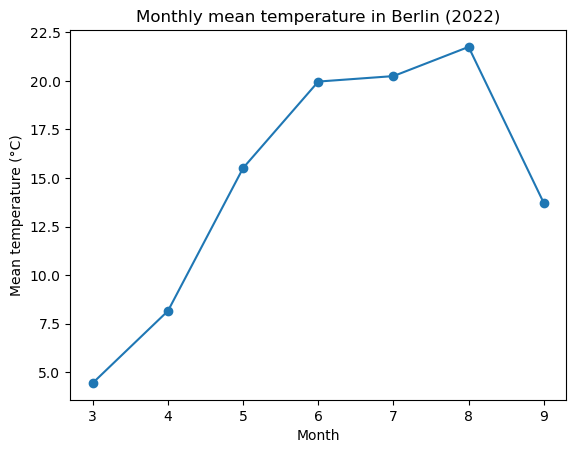

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_weather["month"], monthly_weather["temp_mean"], marker="o")
plt.xlabel("Month")
plt.ylabel("Mean temperature (°C)")
plt.title("Monthly mean temperature in Berlin (2022)")
plt.show()


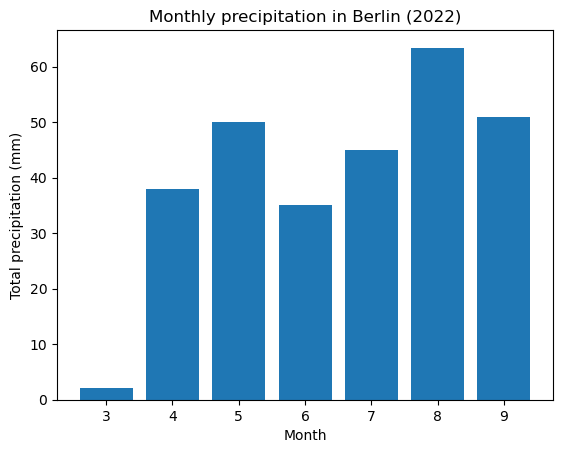

In [7]:
plt.figure()
plt.bar(monthly_weather["month"], monthly_weather["precipitation"])
plt.xlabel("Month")
plt.ylabel("Total precipitation (mm)")
plt.title("Monthly precipitation in Berlin (2022)")
plt.show()


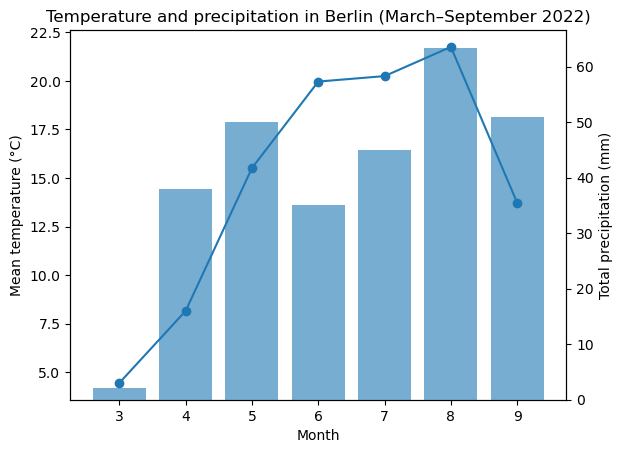

In [8]:
fig, ax1 = plt.subplots()

# Temperature (left axis)
ax1.plot(
    monthly_weather["month"],
    monthly_weather["temp_mean"],
    marker="o"
)
ax1.set_xlabel("Month")
ax1.set_ylabel("Mean temperature (°C)")

# Precipitation (right axis)
ax2 = ax1.twinx()
ax2.bar(
    monthly_weather["month"],
    monthly_weather["precipitation"],
    alpha=0.6
)
ax2.set_ylabel("Total precipitation (mm)")

plt.title("Temperature and precipitation in Berlin (March–September 2022)")
plt.show()
